# [EDA To Prediction(DieTanic)](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook)

## Data Description

* row : passenger
* col : features like passengers`s gender and class
* target : 'ground truth'
* 필사 Link : [EDA To Prediction(DieTanic)](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook)

## Exploratory Data Analysis(EDA)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt style 중 사용 가능한 것들을 출력해 줍니다.

In [2]:
print(plt.style.available)
plt.style.use('seaborn-dark')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Load Data

In [3]:
train_path  = 'data/train.csv'
test_path  = 'data/test.csv'
sample_path = 'data/gender_submission.csv'
data = pd.read_csv(train_path)
print(data.shape)
data.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


892행, 12열 입니다.

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### How many survived?

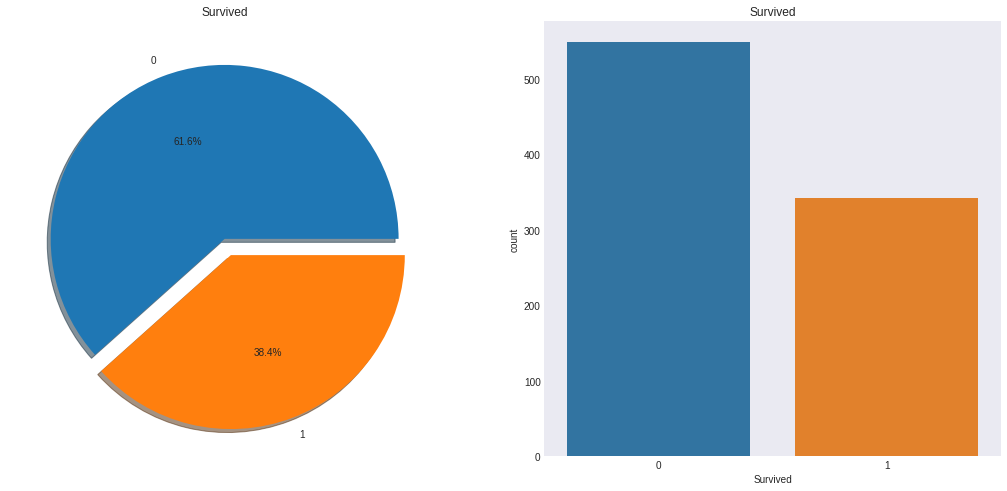

In [5]:
fig, axes = plt.subplots(1,2,figsize= (18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%',ax = axes[0], shadow = True)
axes[0].set_title('Survived')
axes[0].set_ylabel('')
sns.countplot('Survived', data=data, ax = axes[1])
axes[1].set_title('Survived')
plt.show()

In [6]:
# Study
print(data['Survived'].value_counts())
print(type(data['Survived'].value_counts()))
print(data['Survived'].value_counts().index)
print(data['Survived'].value_counts().values)
print(data['Survived'].count())

0    549
1    342
Name: Survived, dtype: int64
<class 'pandas.core.series.Series'>
Int64Index([0, 1], dtype='int64')
[549 342]
891


Series의 value_counts()의 type은 여전히 Series 입니다.  
이는 해당 value 값이 index로 들어가고 counts 가 value로 들어간 Series 형태이기 때문입니다.

변화 전 axes.shape : (2, 2)
변화 후 axes.shape : (4,)


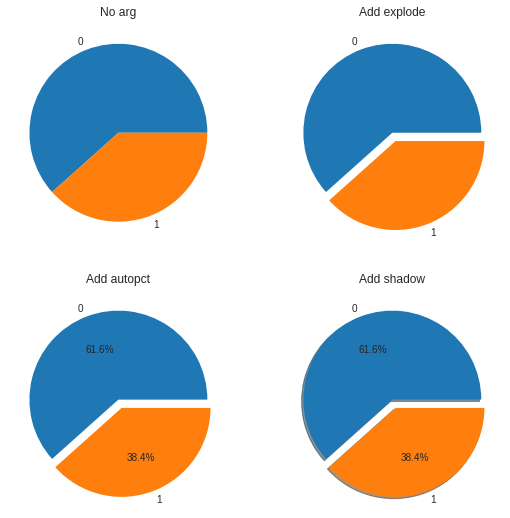

In [7]:
# Study
title_name = ['No arg','Add explode','Add autopct','Add shadow']
fig, axes = plt.subplots(2,2,figsize= (9,9))
print('변화 전 axes.shape :', axes.shape)
axes = axes.flatten()
print('변화 후 axes.shape :', axes.shape)
data['Survived'].value_counts().plot.pie(ax = axes[0])
data['Survived'].value_counts().plot.pie(explode=[0,0.1],ax = axes[1])
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%',ax = axes[2])
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%',ax = axes[3], shadow = True)

for i, ax in enumerate(axes):
    ax.set_ylabel('')
    ax.set_title(title_name[i])

plt.show()

# 넣어주는 인자값을 따로 가져와서 title로 만들고자 했었으나 불가능
# 퍼실님 tip : 딕셔너리 형태로 함수의 argument를 넣을 수 있다. 매개변수 : 인자
# 넣을 때는 **딕셔너리이름
# dicts = {'explode':[0,0.1], 'autopct'  : '%1.1f%%'}
# data['Survived'].value_counts().plot.pie(**dicts[:1],ax = axes[0])
# data['Survived'].value_counts().plot.pie(**dicts,ax = axes[0])


* 작성 방법
  1. 그래프들의 제목들을 리스트로 저장합니다.
  2. 4개의 그래프를 위해 공간 (2,2)를 subplots로 지정합니다.
  3. iterative 하게 사용하기 위해 ax 를 flatten 합니다. [numpy flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html)
  4. flatten 해줬으므로 1차원으로 ax로 설정합니다.(하지만 그래프는 여전히 2,2 로 나옵니다)
  5. 그래프마다 인자값을 다르게해서 넣어줍니다.
  6. enumerate를 사용해서 ax를 순차적으로 접근하여 전체 그래프의 ylabel을 비워줍니다.
  7. enumerate를 사용해서 ax의 index 값을 제목 리스트의 index로 활용합니다.

In [8]:
print(axes)
print(axes[0])
print(type(axes))
print(type(axes[0]))

[<AxesSubplot:title={'center':'No arg'}>
 <AxesSubplot:title={'center':'Add explode'}>
 <AxesSubplot:title={'center':'Add autopct'}>
 <AxesSubplot:title={'center':'Add shadow'}>]
AxesSubplot(0.129545,0.536818;0.343182x0.343182)
<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


* ax를 2차원 배열로 만들어주게되면 ndarray로 됩니다.  
(물론 내부 데이터는 AxeSubplot 입니다.)
* 지금은 flatten을 적용해서 shape가 (2,2) 에서 (4,) 으로 변합니다.  

이제 그래프에 들어간 파라미터들을 알아봅니다.  
[pandas pie](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html)  
[matplotlib pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

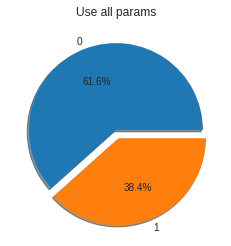

In [9]:
fig, axes = plt.subplots()
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%', shadow = True)
plt.title('Use all params')
plt.ylabel('')
plt.show()

* explode : 파이 사이 빈 간격을 만들어줍니다.
* autopct : 파이 공간 내부에 숫자를 적어줍니다. 표현식을 통해 소수점 몇 자리로 표현할 수 나타낼 수 있습니다.
* shadow : 그림자.

pandas 의 pie 는 matplotlib 의 pie의 기능을 가져온 것 입니다.

### Analysing The Features

* Sex -> Categorical Feature
* 성별은 카테고리형 특징입니다.(not numeric)

In [10]:
data['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

* [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)를 통해 Sex 와 Survived의 그룹 별로 나누고 여러 계산 함수를 적용하여 결과를 하나로 합친 형태를 return합니다.
* 즉, return 되는 groupby object는 주로 비교 또는 계산에 사용됩니다.

In [11]:
data_group1 = data.groupby(['Sex','Survived'])
print("group size()\n", data_group1.size(),end = '\n\n')

group size()
 Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64



In [12]:
print("group sum()\n",data_group1.sum(),end = '\n\n')
print("group mean()\n",data_group1.mean())

group sum()
                  PassengerId  Pclass       Age  SibSp  Parch        Fare
Sex    Survived                                                         
female 0               35223     231   1603.00     98     84   1864.9752
       1              100120     447   5683.00    120    120  12101.6876
male   0              210189    1159  11382.50    206     97  10277.7447
       1               51854     220   2536.67     42     39   4449.5418

group mean()
                  PassengerId    Pclass        Age     SibSp     Parch  \
Sex    Survived                                                         
female 0          434.851852  2.851852  25.046875  1.209877  1.037037   
       1          429.699571  1.918455  28.847716  0.515021  0.515021   
male   0          449.121795  2.476496  31.618056  0.440171  0.207265   
       1          475.724771  2.018349  27.276022  0.385321  0.357798   

                      Fare  
Sex    Survived             
female 0         23.024385  
       1

In [13]:
print(data.groupby(['Sex','Survived'])['Survived'].count(),end = '\n\n')
print(data.groupby(['Sex','Survived'])['Sex'].count(),end = '\n\n')
print(data.groupby(['Sex','Survived']).count())

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

                 PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109  


따로 추가로 열을 지정해주지 않으면 해당 열이 아닌 다른 전체 열에 대한 count를 불러옵니다.


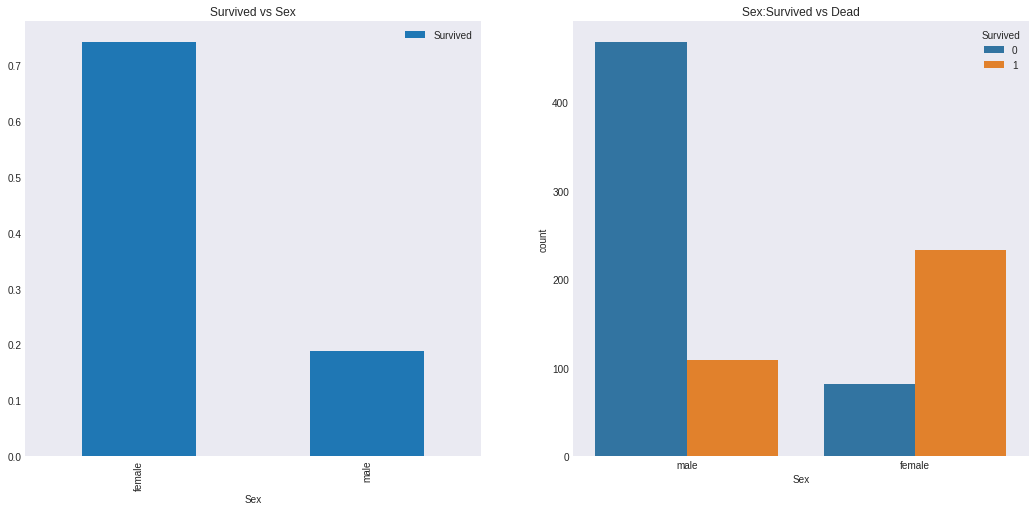

In [14]:
fig ,axes =plt.subplots(1, 2, figsize = (18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax = axes[0])
axes[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data = data,ax = axes[1])
axes[1].set_title('Sex:Survived vs Dead')
plt.show()

* axes[0] 또는 axes[1]를 통해 그래프의 위치를 정해주었습니다.
* 초기에 subplots 에서 1,2를 했기 때문에 그래프는 1행 2열의 위치들을 가집니다.
* seaborn graph 에서는 Hue가 뭔지 몰라서 검색해보았습니다.
* [검색 결과](https://datascience.stackexchange.com/questions/46117/meaning-of-hue-in-seaborn-barplot)
* In seaborn, the hue parameter determines which column in the data frame should be used for colour encoding.
* seaborn 에서 hue 파라미터는 데이터프레임의 어떤 열이 컬러 인코딩에 사용되는지 결정하는 함수 입니다.
* 위 그래프에서 Sex를 x로 가지지만 hue를 Survived에 넣었기 때문에 Survived에 따라 색이 다르게 나오는 것 입니다.

### Pclass --> Ordinal Feature

display 함수를 통해 한 code cell에서 2개 이상의 DataFrame를 표시할 수 있습니다.

In [15]:
display(pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap = 'summer_r'))
display(pd.crosstab(data.Pclass, data.Survived))

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


* [pandas crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)
* 2개 이상의 요인에 따라 간단한 교차표를 만듭니다.
* 교차표 : 두 개의 확률변수를 요약하여 그 연관성을 나타내느 표
* 코드에서는 Pclass(좌석 등급)과 Survived(생존자)의 연관성을 나타내었습니다.
* margin 값을 True로 둬서 요약합계를 구하게 하였습니다.
* 뒤의 style.background_gradient는 gradient style에 따라 배경을 바꿔주는 함수입니다.
* [pandas.io.formats.style.Styler.background_gradient](https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html)

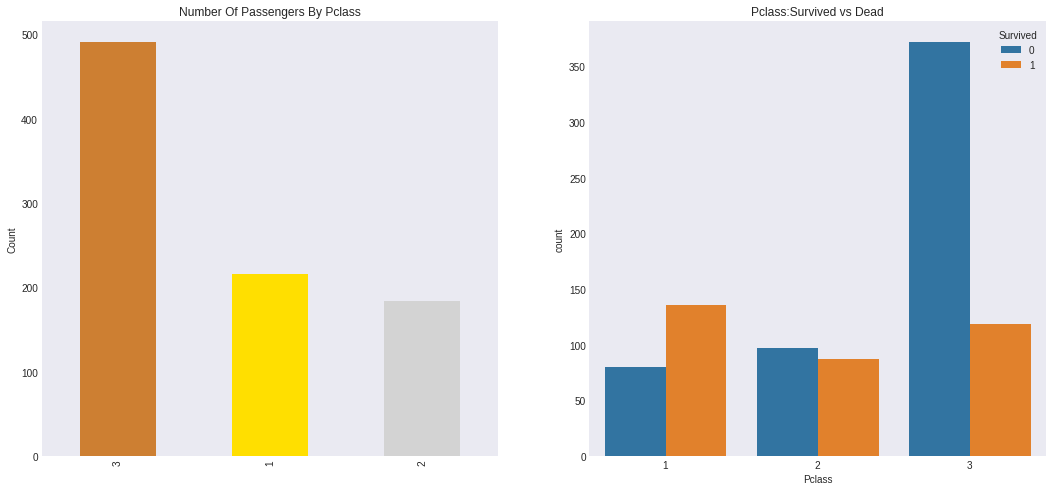

In [16]:
fig,axes = plt.subplots(1, 2, figsize = (18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax = axes[0])
axes[0].set_title('Number Of Passengers By Pclass')
axes[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data = data, ax = axes[1])
axes[1].set_title('Pclass:Survived vs Dead')
plt.show()

* Pclass의 개수를 세서 색을 지정하여 bar 그래프로 표현하였습니다.

In [17]:
pd.crosstab([data.Sex, data.Survived],data.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

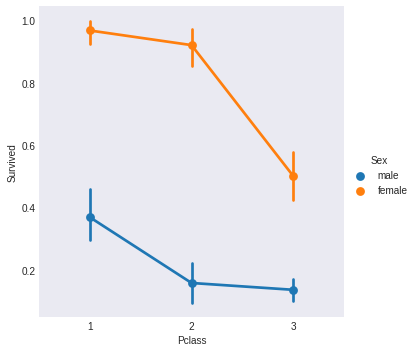

In [18]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)
plt.show()

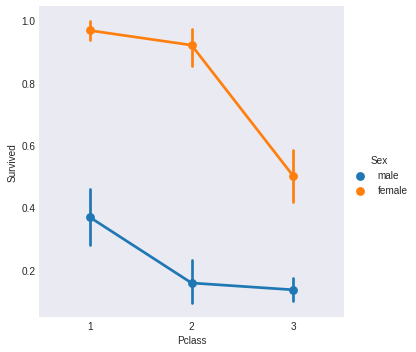

In [19]:
sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = data, kind = 'point')
plt.show()

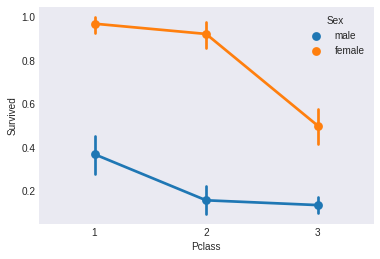

In [20]:
sns.pointplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = data)
plt.show()

* factorplot에 대한 seaborn 공식 docu를 찾지못하였습니다. 마우스를 올려보니 소멸 예징이니 catplot 쓰라는 군요.
* catplot의 kind를 point로 해주면 동일한 그래프가 나옵니다.
* 아니면 pointplot을 사용하시면 됩니다.

### Age--> Continous Feature

In [21]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [22]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

* Age 열의 최대, 최소, 평균을 구합니다.

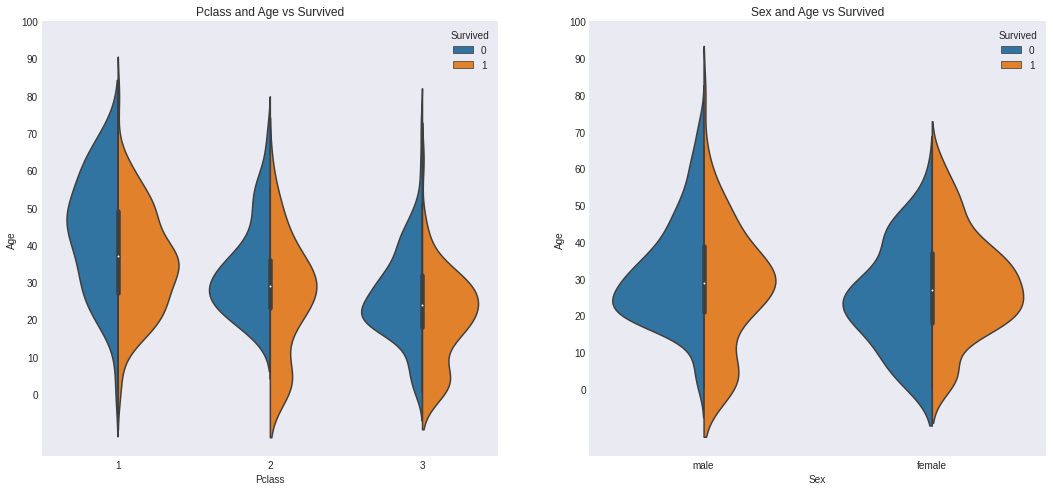

In [23]:
fig ,axes = plt.subplots(1, 2, figsize = (18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data = data, split = True, ax = axes[0])
axes[0].set_title('Pclass and Age vs Survived')
axes[0].set_yticks(range(0,110,10))
sns.violinplot("Sex", "Age", hue = "Survived", data = data, split = True, ax = axes[1])
axes[1].set_title('Sex and Age vs Survived')
axes[1].set_yticks(range(0,110,10))
plt.show()

* [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
* 커널 밀도 추정과 박스 플롯이 합쳐진 형태를 그려줍니다.
* 다중 분포를 쉽게 확인할 수 있지만 샘플 사이즈에 영향을 받습니다.
* split 파라미터를 통해서 바이올린을 나눠서 hue에 따라 두 개로 표현합니다.

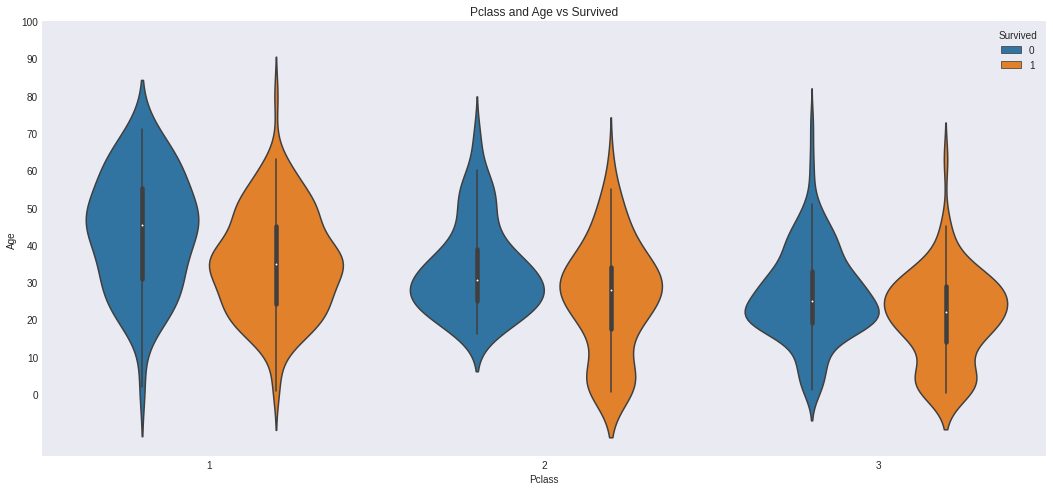

In [24]:
fig ,axes = plt.subplots( figsize = (18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data = data)
axes.set_title('Pclass and Age vs Survived')
axes.set_yticks(range(0,110,10))

plt.show()

In [25]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [26]:
print(data['Name'], data['Initial'])

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object 0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object


* 'a~z,A~Z + .' 형태를 가져와서 저장한다. 지칭대명사 같습니다.

In [27]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


* T는 transpose

In [28]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace = True)

replace를 통해 해당 값을 다른 값으로 바꿔줍니다.(inplace를 적용하여 data의 값을 바꿔줍니다.)

In [29]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [30]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [31]:
data.Age.isnull().any()

False

* 새로 구한 Initial 값에 따라 Age에 NULL 값인 경우에 넣어줍니다.
* Age 열에 null 값이 없군요

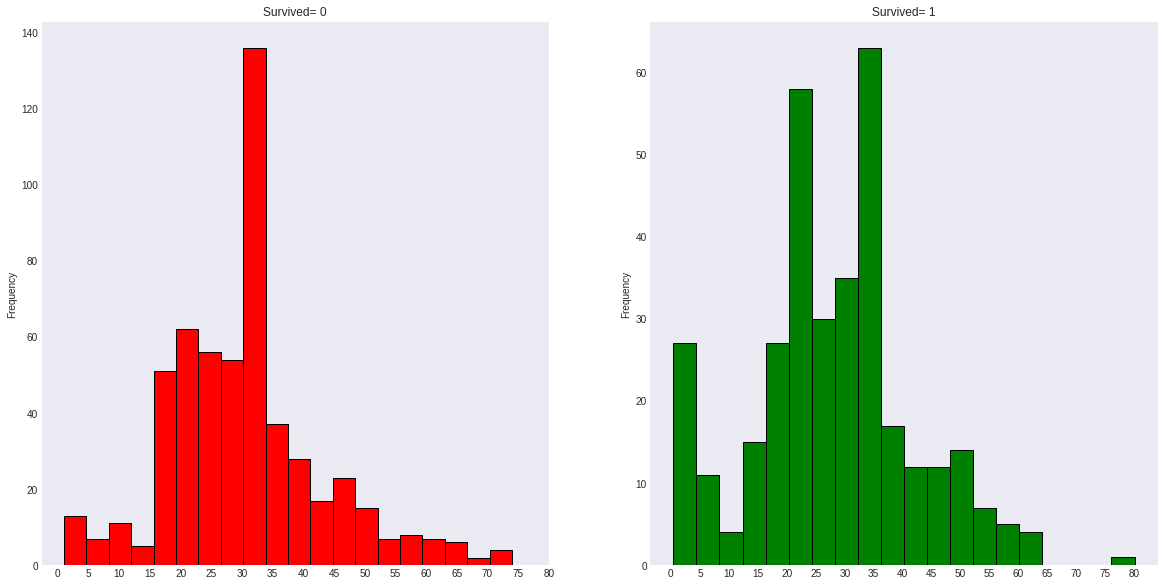

In [37]:
fig, axes = plt.subplots(1, 2, figsize = (20,10))
data[data['Survived']==0].Age.plot.hist(ax = axes[0], bins=20, edgecolor = 'black', color = 'red')
axes[0].set_title('Survived= 0')
x1 = list(range(0,85,5))
axes[0].set_xticks(x1)
data[data['Survived'] == 1].Age.plot.hist(ax = axes[1], color = 'green', bins = 20, edgecolor = 'black')
axes[1].set_title('Survived= 1')
x2=list(range(0,85,5))
axes[1].set_xticks(x2)
plt.show()

* [matplotlib.pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
* data[data['Survived']==0].Age.plot.hist(ax = axes[0], bins=20, edgecolor = 'black', color = 'red')
* data의 Survived 값이 0과 1인 경우에 data의 Age 값의 히스토그램을 출력합니다.(색을 다르게하여 구분)
* bins : 범위 내에서 동일한 길이의 바의 갯수를 말합니다.
* bins를 높이면 bar가 촘촘해지고 낮추면 bar가 넓어집니다.


### Observation